In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import glob
import os

from scipy.stats import pearsonr, kruskal

Initially processes and analyzes the complete augmented dataset, but uses separate arrival-only and augmented-arrival datasets for saving.

In [ ]:


# directory containing the monthly CSVs
CSV_DIR = "Datasets/Arrival_With_Weather/2020-2022"

desired_cols = [
    "FL_DATE","AIRLINE","AIRLINE_DOT","AIRLINE_CODE","FL_NUMBER",
    "ORIGIN","ORIGIN_CITY","DEST","DEST_CITY",
    "CRS_DEP_TIME","DEP_TIME","DEP_DELAY",
    "TAXI_OUT","WHEELS_OFF","WHEELS_ON","TAXI_IN",
    "CRS_ARR_TIME","ARR_TIME","ARR_DELAY",
    "CANCELLED","CANCELLATION_CODE","DIVERTED",
    "CRS_ELAPSED_TIME","ELAPSED_TIME","AIR_TIME","DISTANCE",
    "DELAY_DUE_CARRIER","DELAY_DUE_WEATHER","DELAY_DUE_NAS",
    "DELAY_DUE_SECURITY","DELAY_DUE_LATE_AIRCRAFT",
    # weather
    "ORIGIN_TEMP","ORIGIN_PRESSURE","ORIGIN_U_COMP_WIND",
    "ORIGIN_V_COMP_WIND","ORIGIN_PRECIP_6HR",
    "DEST_TEMP","DEST_PRESSURE","DEST_U_COMP_WIND",
    "DEST_V_COMP_WIND","DEST_PRECIP_6HR",
]

#rename map: current names → desired names
rename_map = {
    "FlightDate": "FL_DATE",
    "Reporting_Airline": "AIRLINE",
    "DOT_ID_Reporting_Airline": "AIRLINE_DOT",
    "IATA_CODE_Reporting_Airline": "AIRLINE_CODE",
    "Flight_Number_Reporting_Airline": "FL_NUMBER",
    "Origin": "ORIGIN",
    "OriginCityName": "ORIGIN_CITY",
    "Dest": "DEST",
    "DestCityName": "DEST_CITY",
    "CRSDepTime": "CRS_DEP_TIME",
    "DepTime": "DEP_TIME",
    "DepDelay": "DEP_DELAY",
    "TaxiOut": "TAXI_OUT",
    "WheelsOff": "WHEELS_OFF",
    "WheelsOn": "WHEELS_ON",
    "TaxiIn": "TAXI_IN",
    "CRSArrTime": "CRS_ARR_TIME",
    "ArrTime": "ARR_TIME",
    "ArrDelay": "ARR_DELAY",
    "Cancelled": "CANCELLED",
    "CancellationCode": "CANCELLATION_CODE",
    "Diverted": "DIVERTED",
    "CRSElapsedTime": "CRS_ELAPSED_TIME",
    "ActualElapsedTime": "ELAPSED_TIME",
    "AirTime": "AIR_TIME",
    "Distance": "DISTANCE",
    "CarrierDelay": "DELAY_DUE_CARRIER",
    "WeatherDelay": "DELAY_DUE_WEATHER",
    "NASDelay": "DELAY_DUE_NAS",
    "SecurityDelay": "DELAY_DUE_SECURITY",
    "LateAircraftDelay": "DELAY_DUE_LATE_AIRCRAFT",
    "Origin_2m_temperature": "ORIGIN_TEMP",
    "Origin_mean_sea_level_pressure": "ORIGIN_PRESSURE",
    "Origin_10m_u_component_of_wind": "ORIGIN_U_COMP_WIND",
    "Origin_10m_v_component_of_wind": "ORIGIN_V_COMP_WIND",
    "Origin_total_precipitation_6hr": "ORIGIN_PRECIP_6HR",
    "Dest_2m_temperature": "DEST_TEMP",
    "Dest_mean_sea_level_pressure": "DEST_PRESSURE",
    "Dest_10m_u_component_of_wind": "DEST_U_COMP_WIND",
    "Dest_10m_v_component_of_wind": "DEST_V_COMP_WIND",
    "Dest_total_precipitation_6hr": "DEST_PRECIP_6HR"
}

# gather, standardize, and concatenate
all_files = sorted(glob.glob(os.path.join(CSV_DIR, "*.csv")))
standardized_dfs = []

for fp in all_files:
    df = pd.read_csv(fp, low_memory=False)
    df = df.rename(columns=rename_map)
    df["FL_DATE"] = pd.to_datetime(df["FL_DATE"])

    # ensure every desired column exists
    for col in desired_cols:
        if col not in df.columns:
            df[col] = pd.NA
    # select & reorder
    df = df[desired_cols]
    standardized_dfs.append(df)

# final merge
merged = pd.concat(standardized_dfs, ignore_index=True)

# save out the combined dataset
merged.to_csv("Datasets/2020_22_Arrival_Combined.csv", index=False)


Load and view dataset

In [3]:

df_augmented = pd.read_csv("Datasets/2020_22_Arrival_Combined.csv", encoding="utf-8")

C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\3779288787.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_augmented = pd.read_csv("Datasets/2020_22_Arrival_Combined.csv", encoding="utf-8")


In [4]:
df = df_augmented


In [5]:

df.shape

(17412876, 41)

In [6]:

df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'FL_NUMBER',
       'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED',
       'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER',
       'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT',
       'ORIGIN_TEMP', 'ORIGIN_PRESSURE', 'ORIGIN_U_COMP_WIND',
       'ORIGIN_V_COMP_WIND', 'ORIGIN_PRECIP_6HR', 'DEST_TEMP', 'DEST_PRESSURE',
       'DEST_U_COMP_WIND', 'DEST_V_COMP_WIND', 'DEST_PRECIP_6HR'],
      dtype='object')

In [7]:

df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,...,ORIGIN_TEMP,ORIGIN_PRESSURE,ORIGIN_U_COMP_WIND,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR
0,2020-01-17,B6,20409,B6,942,PBI,"West Palm Beach/Palm Beach, FL",BDL,"Hartford, CT",1940,...,297.41843,102555.180,-7.572047,-4.783078,6.001405e-04,264.76760,103905.90,2.523050,-2.797639,-1.862645e-09
1,2020-01-18,B6,20409,B6,942,PBI,"West Palm Beach/Palm Beach, FL",BDL,"Hartford, CT",1940,...,296.14220,102541.640,-6.024319,3.832024,3.824383e-05,267.59805,101774.24,-1.546868,3.089462,5.056867e-03
2,2020-01-19,B6,20409,B6,942,PBI,"West Palm Beach/Palm Beach, FL",BDL,"Hartford, CT",1940,...,298.19740,101954.280,1.425548,3.954334,-1.117587e-08,272.92520,101062.31,3.529461,-2.081129,6.651506e-06
3,2020-01-20,B6,20409,B6,942,PBI,"West Palm Beach/Palm Beach, FL",BDL,"Hartford, CT",1940,...,293.29083,101960.960,1.265657,-6.558300,1.746695e-04,265.67078,102721.19,2.869700,-2.142799,-9.313226e-09
4,2020-01-21,B6,20409,B6,942,PBI,"West Palm Beach/Palm Beach, FL",BDL,"Hartford, CT",1940,...,290.89350,101853.195,5.317981,-7.284566,3.297813e-05,261.80753,103107.73,2.684846,-1.938694,0.000000e+00


Convert FL_DATE to "datetime" recognized by pandas

In [8]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], format='%Y-%m-%d').copy()

Toggle assertions on or off

In [9]:
TEST: bool = True

Drop cancelled and diverted flights, they are outside of our scope. we only want delayed flights(keep until finished with visualizations)

Attempt to drop duplicates, we found out there aren't any

In [10]:
df_len_with_duplicates = len(df)
df.drop_duplicates(inplace=True)
if TEST:
  assert len(df) == df_len_with_duplicates  # no duplicates

In [11]:
delay_cols = [
    "DELAY_DUE_CARRIER",
    "DELAY_DUE_WEATHER",
    "DELAY_DUE_NAS",
    "DELAY_DUE_SECURITY",
    "DELAY_DUE_LATE_AIRCRAFT"
]

def split_by_components(df: pd.DataFrame):
    # cancelled or diverted masks
    cancelled = df["CANCELLED"] == 1
    diverted  = df["DIVERTED"]  == 1

    # has _any_ positive delay component?
    has_delay = df[delay_cols].gt(0).any(axis=1)

    # only keep non‑cancelled & non‑diverted rows
    valid     = ~(cancelled | diverted)

    # slice full-rows (including weather) into two sets
    delay_df    = df.loc[has_delay  & valid].copy()
    no_delay_df = df.loc[~has_delay & valid].copy()
    n_cancel_df   = df.loc[cancelled | diverted].copy()

    return delay_df, no_delay_df, n_cancel_df

# 3) run the split
delay_df, no_delay_df, cancel_df = split_by_components(df)

Visualize presence of delay components

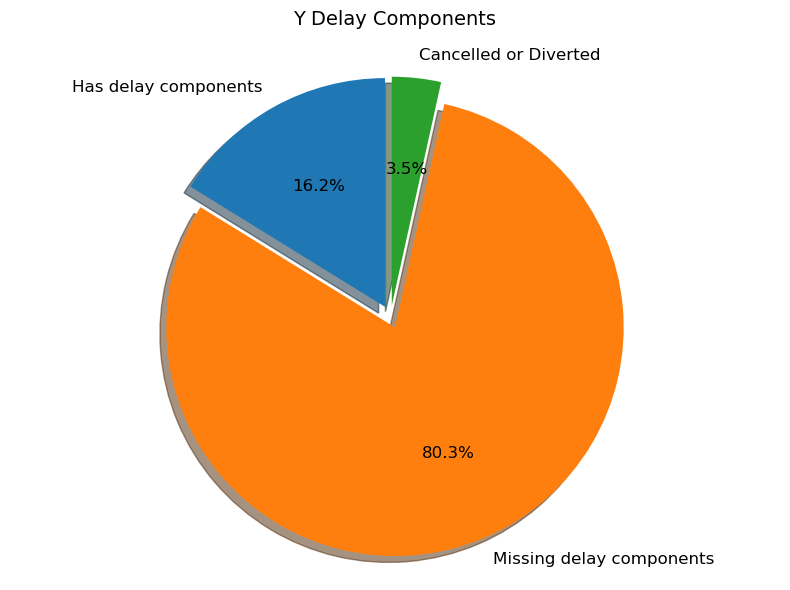

In [12]:
# counts
sizes = [
    len(delay_df),
    len(no_delay_df),
    len(cancel_df)
]
labels = [
    "Has delay components",
    "Missing delay components",
    "Cancelled or Diverted"
]
# optional “explode” to offset each slice slightly
explode = (0.05, 0.05, 0.05)

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(
    sizes,
    labels=labels,
    explode=explode,
    autopct="%1.1f%%",
    startangle=90,
    shadow=True,
    textprops={"fontsize": 12}
)
ax.axis("equal")  # keep it as a circle
ax.set_title("Y Delay Components", pad=20, fontsize=14)
plt.tight_layout()
plt.show()

Visualize presence of delay components over each month in the dataset. Blue represents data that we can use.

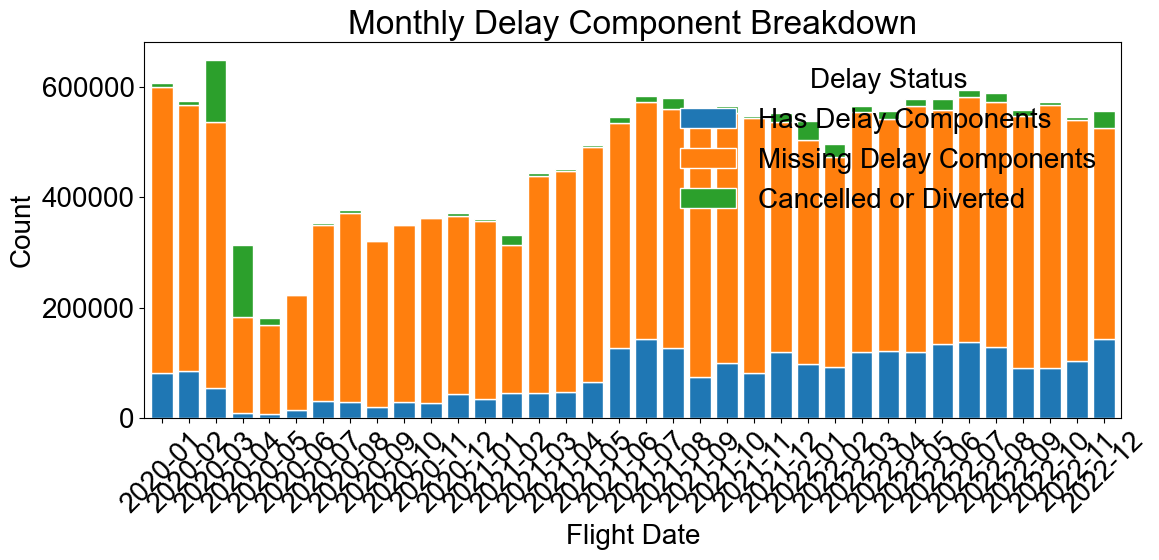

In [14]:


# get Year‑Month counts on each
delay_counts    = delay_df  ["FL_DATE"].dt.strftime("%Y-%m").value_counts().sort_index()
no_delay_counts = no_delay_df["FL_DATE"].dt.strftime("%Y-%m").value_counts().sort_index()
cancel_counts   = cancel_df ["FL_DATE"].dt.strftime("%Y-%m").value_counts().sort_index()

# combine into one DataFrame
monthly = pd.concat(
    [delay_counts, no_delay_counts, cancel_counts],
    axis=1,
    keys=["Has Delay Components", "Missing Delay Components", "Cancelled or Diverted"]
).fillna(0).astype(int)

# reset index to turn Year‑Month into a column
monthly = monthly.reset_index().rename(columns={"index": "FL_DATE"})

# plot as a stacked bar
cols = ["Has Delay Components", "Missing Delay Components", "Cancelled or Diverted"]
df_plot = monthly.set_index("FL_DATE")[cols]

# set a nice global style
plt.rcParams.update({
    "font.family": "Arial",
    "font.size": 20
})

fig, ax = plt.subplots(figsize=(12, 6))

# plot stacked bars
df_plot.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    width=0.8,              # bar width
    edgecolor="white"       # crisp white lines between bars
)

# labels & title
ax.set_xlabel("Flight Date")
ax.set_ylabel("Count")
ax.set_title("Monthly Delay Component Breakdown")

# legend
ax.legend(title="Delay Status", loc="upper right", frameon=False)

# rotate x-labels for readability
ax.tick_params(axis="x", rotation=45)

# tighten up
plt.tight_layout()
plt.show()


In [15]:
# delay component columns
delay_cols = [
    'DELAY_DUE_CARRIER','DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS','DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT'
]


# build a mask of “has any delay component > 0”
mask = df[delay_cols].fillna(0).sum(axis=1) > 0

# slice out those rows (and copy to avoid SettingWithCopyWarnings)
delay_components_df = df.loc[mask].copy()


no_delay_components_df = df.loc[~mask & (df['CANCELLED']==0) & (df['DIVERTED']==0)].copy()
cancelled_or_diverted_df = df.loc[(df['CANCELLED']==1) | (df['DIVERTED']==1)].copy()


# compute component sums, filling NaN→0
comp_sum = delay_components_df[delay_cols].fillna(0).sum(axis=1)

# compare to ARR_DELAY (also fillna→0 just in case)
arr_delay = delay_components_df['ARR_DELAY'].fillna(0)
matches  = comp_sum.eq(arr_delay)

# show the offending rows
mismatches = delay_components_df.loc[~matches, delay_cols + ['ARR_DELAY','FL_DATE','AIRLINE']]
print(f"{len(mismatches)} bad row(s):")
print(mismatches)

# to see the difference explicitly
mismatches = mismatches.assign(Difference=comp_sum[~matches] - arr_delay[~matches])
print(mismatches)


0 bad row(s):
Empty DataFrame
Columns: [DELAY_DUE_CARRIER, DELAY_DUE_WEATHER, DELAY_DUE_NAS, DELAY_DUE_SECURITY, DELAY_DUE_LATE_AIRCRAFT, ARR_DELAY, FL_DATE, AIRLINE]
Index: []
Empty DataFrame
Columns: [DELAY_DUE_CARRIER, DELAY_DUE_WEATHER, DELAY_DUE_NAS, DELAY_DUE_SECURITY, DELAY_DUE_LATE_AIRCRAFT, ARR_DELAY, FL_DATE, AIRLINE, Difference]
Index: []


Set data to just the delay components to simplify referencing below

In [16]:
data = delay_components_df.copy()

Remove outliers using IQR method on the overall arrival delay

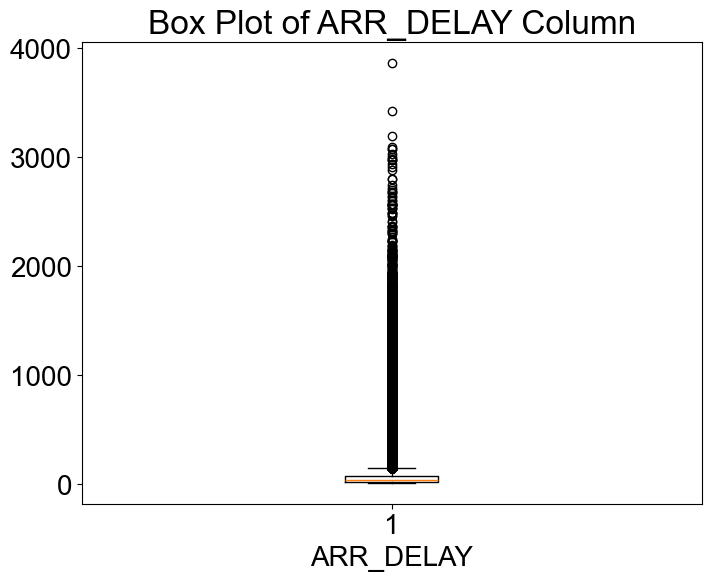

Summary Statistics after Removing Outliers:
count    2.587543e+06
mean     4.648156e+01
std      3.177889e+01
min      1.500000e+01
25%      2.200000e+01
50%      3.500000e+01
75%      6.100000e+01
max      1.500000e+02
Name: ARR_DELAY, dtype: float64
count    2.819049e+06
mean     6.603571e+01
std      9.399501e+01
min      1.500000e+01
25%      2.300000e+01
50%      3.800000e+01
75%      7.400000e+01
max      3.864000e+03
Name: ARR_DELAY, dtype: float64
0.0821220205821183
231506


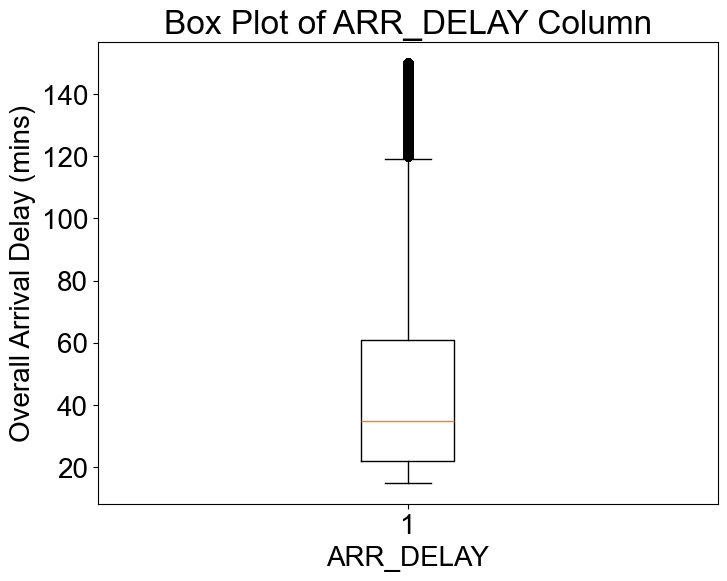

In [17]:
# Boxplot before removing outliers
plt.figure(figsize=(8, 6))
plt.boxplot(data['ARR_DELAY'])
plt.title('Box Plot of ARR_DELAY Column')
plt.xlabel('ARR_DELAY')
plt.show()

# Calculate Q1, Q3, IQR
Q1 = data['ARR_DELAY'].quantile(0.25)
Q3 = data['ARR_DELAY'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = data[(data['ARR_DELAY'] >= lower_bound) & (data['ARR_DELAY'] <= upper_bound)]

cat_cols = ['CRS_DEP_TIME', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME',
      'DISTANCE', "DEP_DELAY", "ARR_DELAY",
    "DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER",
    "DELAY_DUE_NAS",     "DELAY_DUE_SECURITY",
    "DELAY_DUE_LATE_AIRCRAFT"
]
non_cat_cols = ["CRS_DEP_TIME", "TAXI_OUT", "TAXI_IN",
    "CRS_ARR_TIME", "CRS_ELAPSED_TIME",
    "DISTANCE", "ORIGIN_TEMP", "ORIGIN_PRESSURE", "ORIGIN_U_COMP_WIND",
    "ORIGIN_V_COMP_WIND", "ORIGIN_PRECIP_6HR",
    "DEST_TEMP", "DEST_PRESSURE", "DEST_U_COMP_WIND",
    "DEST_V_COMP_WIND", "DEST_PRECIP_6HR",
]
X_cols = []
y_cols = []


print("Summary Statistics after Removing Outliers:")
print(data_no_outliers['ARR_DELAY'].describe())
print(data["ARR_DELAY"].describe())

print((len(data) - len(data_no_outliers)) / len(data))
print((len(data) - len(data_no_outliers)))

# Box plot after removing outliers
plt.figure(figsize=(8, 6))
plt.boxplot(data_no_outliers['ARR_DELAY'])
plt.title('Box Plot of ARR_DELAY Column')
plt.xlabel('ARR_DELAY')
plt.ylabel("Overall Arrival Delay (mins)")
plt.show()


Calculate Pearson Correlation on just the non-categorical attributes, since Pearson Correlation is invalid for categorical attributes

In [ ]:


def calculate_pearson_score(df: pd.DataFrame, col: str, y) -> float:
  """
  Calculates the Pearson correlation coefficient between two columns in a DataFrame.

  Args:
    df: DataFrame.
    col: The name of the first column.
    y: The name of the second column.

  Returns:
    Pearson correlation coefficient.
  """
  try:
    corr,_ = pearsonr(df[col].values, y.values)
    return corr
  except:
    return 0

# Calculate the Pearson correlation coefficient for each column w/ ARR_DELAY
pearson_scores = {}
cols=['CRS_DEP_TIME', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME',
      'DISTANCE',"ORIGIN_TEMP", "ORIGIN_PRESSURE", "ORIGIN_U_COMP_WIND",
      "ORIGIN_V_COMP_WIND", "ORIGIN_PRECIP_6HR",
      "DEST_TEMP", "DEST_PRESSURE", "DEST_U_COMP_WIND",
      "DEST_V_COMP_WIND", "DEST_PRECIP_6HR"]

for col in cols:
    pearson_scores[col] = calculate_pearson_score(data_no_outliers, col, data_no_outliers["ARR_DELAY"])

# Sort the Pearson correlation coefficients
sorted_pearson_scores = sorted(pearson_scores.items(), key=lambda x: x[1], reverse=True)

for col, score in sorted_pearson_scores:
    print(f"{col}: {score}")

# NOTE: ELAPSED TIME IS REDUNDANT

CRS_DEP_TIME: 0.06557745431176633
ORIGIN_PRECIP_6HR: 0.048751329151474954
CRS_ARR_TIME: 0.04609600954507103
ORIGIN_TEMP: 0.042130342021835875
TAXI_OUT: 0.03965269154939004
DEST_TEMP: 0.03535651600764061
DEST_PRECIP_6HR: 0.03438639551127908
TAXI_IN: 0.02152497378914229
ORIGIN_V_COMP_WIND: 0.019164744900998454
ORIGIN_U_COMP_WIND: 0.017241135986873747
DEST_U_COMP_WIND: 0.01612016135213668
DEST_V_COMP_WIND: 0.013089605050563056
CRS_ELAPSED_TIME: -0.014260739907847325
DISTANCE: -0.02400108070177401
ORIGIN_PRESSURE: -0.0387198449406486
DEST_PRESSURE: -0.03916613301481044


Calculate Kruskal-Wallis H-test to sort categorical attributes and prove redundancy for some attributes

In [ ]:


cols = ['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE',
        'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY']

# Calculate the Kruskal-Wallis H statistic for each categorical variable
h_values = {}
for col in cols:
    h, p_value = kruskal(*[group['ARR_DELAY'] for name, group in data_no_outliers.groupby(col)])
    h_values[col] = h

# Sort the columns by their H values
sorted_cols = sorted(h_values, key=h_values.get, reverse=True)

print("Categorical columns ranked by their correlation with:")
for col in sorted_cols:
    print(f"{col}: {h_values[col]}")

# drop AIRLINE_DOT, AIRLINE_CODE, DOT_CODE bc redundant w/ AIRLINE
# drop ORIGIN_CITY, DEST_CITY bc redundant (basically) w/ ORIGIN, DEST

Categorical columns ranked by their correlation with:
FL_DATE: 58195.02940054093
AIRLINE: 21631.929194371347
AIRLINE_DOT: 21631.929194371347
AIRLINE_CODE: 21631.929194371347
ORIGIN: 19862.97811110845
FL_NUMBER: 19381.629651495572
ORIGIN_CITY: 18989.32516444056
DEST: 14135.47795312599
DEST_CITY: 13232.04336943784


In [20]:
X_aug_df = data_no_outliers[
    [
        "FL_DATE",  # yyymmdd of flight (ordinal, discrete),
        "FL_NUMBER",
        "AIRLINE",  # name of airline (nominal, discrete)
        # Ignore AIRLINE_CODE because it is redundant
        "ORIGIN",  # origin airport code (nomincal, discrete)
        # Ignore ORIGIN_CITY because it is redundant
        "DEST",  # destination airport code (nomincal, discrete)
        # Ignore DEST_CITY because it is redundant
        "CRS_DEP_TIME",  # hhmm planned departure time (ordinal, discrete)
        "CRS_ARR_TIME",  # hhmm planned arrival time (ordinal, discrete)
        # Ignore CRS_ELAPSED_TIME because it is redundant since we have CRS_DEP_TIME and CRS_ARR_TIME
        "DISTANCE",  # miles between airports (ratio, discrete)
        "TAXI_IN",
        "TAXI_OUT",
        "ORIGIN_TEMP", "ORIGIN_PRESSURE", "ORIGIN_U_COMP_WIND",  #weather observations and 'predictions'
        "ORIGIN_V_COMP_WIND", "ORIGIN_PRECIP_6HR",
        "DEST_TEMP", "DEST_PRESSURE", "DEST_U_COMP_WIND",
        "DEST_V_COMP_WIND", "DEST_PRECIP_6HR"
    ]
]

X_df = data_no_outliers[
    [
        "FL_DATE",  # yyymmdd of flight (ordinal, discrete),
        "FL_NUMBER",
        "AIRLINE",  # name of airline (nominal, discrete)
        # Ignore AIRLINE_CODE because it is redundant
        "ORIGIN",  # origin airport code (nomincal, discrete)
        # Ignore ORIGIN_CITY because it is redundant
        "DEST",  # destination airport code (nomincal, discrete)
        # Ignore DEST_CITY because it is redundant
        "CRS_DEP_TIME",  # hhmm planned departure time (ordinal, discrete)
        "CRS_ARR_TIME",  # hhmm planned arrival time (ordinal, discrete)
        # Ignore CRS_ELAPSED_TIME because it is redundant since we have CRS_DEP_TIME and CRS_ARR_TIME
        "DISTANCE",  # miles between airports (ratio, discrete)
        "TAXI_IN",
        "TAXI_OUT"
    ]
]

Y_df = data_no_outliers[
    [
        # "CANCELLATION_CODE",  # reason for cancellation, NA if not cancelled (nominal, discrete)
        # Ignore CANCELLED because it is redundant, CANCELLATION_CODE provides more information
        # "DIVERTED",  # 1 if diverted, 0 if not (ordinal, discrete) NOTE: NOT SURE IF WE WANT TO KEEP
        # "AIR_TIME",  # Flight time, minutes (ratio, discrete)
        "DELAY_DUE_CARRIER",  # delay due to technical difficulties / damage / carrier efficiency (ratio, discrete)
        # Hypothesis: AIRLINE, ORIGIN, DEST may inform DELAY_DUE_CARRIER
        "DELAY_DUE_WEATHER",  # delay due to weather (ratio, discrete)
        # Hypothesis: FL_DATE, ORIGIN, DEST may inform DELAY_DUE_WEATHER
        "DELAY_DUE_SECURITY",  # delay due to security (ratio, discrete)
        # Hypothesis: FL_DATE, ORIGIN, CRS_DEP_TIME, DISTANCE may inform DELAY_DUE_SECURITY,
        "DELAY_DUE_NAS",  # not sure how this will do due to lacking info in features
        "DELAY_DUE_LATE_AIRCRAFT"  # delay due to late aircraft (ratio, discrete)
        # Hypothesis: AIRLINE, CRS_DEP_TIME may inform DELAY_DUE_LATE_AIRCRAFT
    ]
]

arr_only_y_df = data_no_outliers["ARR_DELAY"]


# AIRLINE_CODE, DOT_CODE, FL_NUMBER are ignored because they are unique identifiers
# TAXI_OUT, WHEELS_OFF, WHEELS_ON, TAXI_IN are ignored because they seem irrelevant NOTE: MAY WANT TO LOOK INTO THIS
# DEP_TIME, DEP_DELAY, ARR_TIME, ARR_DELAY, ELAPSED_TIME are ignored because the individual delay contributions factor into them

# WARNING: DELAY_DUE_NAS might not have sufficient info to predict this. It is National Air System Delay, minutes.


Check if there are any NA values in X_df. There are none

In [21]:
# Look for any NA values in X_aug
if TEST:
  X_aug_df.replace('', np.nan, inplace=True)
  pd.isna(X_aug_df).sum().sum() == 0

C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\3190095547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug_df.replace('', np.nan, inplace=True)


In [22]:
# Look for any NA values in X
if TEST:
  X_df.replace('', np.nan, inplace=True)
  pd.isna(X_df).sum().sum() == 0

C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\3653023300.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df.replace('', np.nan, inplace=True)


Label encode airline and airport. ORIGIN and DEST should be encoded together to preserve the relationship between outbound and inbound same airports.

In [23]:
# Assign integer labels to airline
airline_encoder = LabelEncoder()
X_aug_df["AIRLINE"] = airline_encoder.fit_transform(X_aug_df["AIRLINE"])

# Assign integer labels to airport code
airport_aug_encoder = LabelEncoder()
airport_aug_encoder.fit(pd.concat([X_aug_df["ORIGIN"],X_aug_df["DEST"]], axis=0))
X_aug_df["ORIGIN"] = airport_aug_encoder.transform(X_aug_df["ORIGIN"])
X_aug_df["DEST"] = airport_aug_encoder.transform(X_aug_df["DEST"])
# assert X_aug_df.loc[1, "ORIGIN"] == X_aug_df.loc[3, "ORIGIN"] == X_aug_df.loc[2, "DEST"]  # all MSP

X_aug_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\1916679218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug_df["AIRLINE"] = airline_encoder.fit_transform(X_aug_df["AIRLINE"])
C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\1916679218.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug_df["ORIGIN"] = airport_aug_encoder.transform(X_aug_df["ORIGIN"])
C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\1916679218.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,FL_DATE,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,ORIGIN_TEMP,ORIGIN_PRESSURE,ORIGIN_U_COMP_WIND,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR
14,2020-01-31,942,3,268,30,1940,2229,1133.0,4.0,11.0,296.87415,101568.35,-1.342188,4.131715,9.819865e-05,273.95145,102406.110,1.161489,1.634387,0.000000
23,2020-01-19,945,3,48,76,900,1135,728.0,9.0,46.0,274.08585,100518.55,1.013823,3.546650,7.232059e-03,282.61914,101338.875,3.235539,0.922186,0.000003
44,2020-01-20,946,3,76,48,1215,1423,728.0,5.0,27.0,270.83090,102710.25,-0.429376,-2.875068,-1.117587e-08,270.10590,102192.340,3.128600,-4.198301,0.000004
79,2020-01-04,951,3,48,221,1455,1821,1121.0,35.0,13.0,278.87457,100715.28,0.484952,-0.206877,1.558907e-03,295.82275,101544.870,5.907061,4.351600,0.002483
85,2020-01-11,951,3,48,221,1445,1810,1121.0,11.0,13.0,290.23390,101940.43,4.860241,7.964095,-1.117587e-08,300.21704,102251.766,-3.169111,5.732178,0.000181


In [24]:
# Assign integer labels to airline
airline_encoder = LabelEncoder()
X_df["AIRLINE"] = airline_encoder.fit_transform(X_df["AIRLINE"])

# Assign integer labels to airport code
airport_encoder = LabelEncoder()
airport_encoder.fit(pd.concat([X_df["ORIGIN"],X_df["DEST"]], axis=0))
X_df["ORIGIN"] = airport_encoder.transform(X_df["ORIGIN"])
X_df["DEST"] = airport_encoder.transform(X_df["DEST"])
# assert X_df.loc[1, "ORIGIN"] == X_df.loc[3, "ORIGIN"] == X_df.loc[2, "DEST"]  # all MSP

X_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\1727180027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df["AIRLINE"] = airline_encoder.fit_transform(X_df["AIRLINE"])
C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\1727180027.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df["ORIGIN"] = airport_encoder.transform(X_df["ORIGIN"])
C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\1727180027.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,FL_DATE,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT
14,2020-01-31,942,3,268,30,1940,2229,1133.0,4.0,11.0
23,2020-01-19,945,3,48,76,900,1135,728.0,9.0,46.0
44,2020-01-20,946,3,76,48,1215,1423,728.0,5.0,27.0
79,2020-01-04,951,3,48,221,1455,1821,1121.0,35.0,13.0
85,2020-01-11,951,3,48,221,1445,1810,1121.0,11.0,13.0


Show number of unique airports

In [25]:
print(f"Number of airports in data: {max([max(X_df['ORIGIN']), max(X_df['DEST'])]) + 1}")

Number of airports in data: 378


In [26]:
print(f"Number of airports in augmented data: {max([max(X_aug_df['ORIGIN']), max(X_aug_df['DEST'])]) + 1}")

Number of airports in augmented data: 378


Convert hhmm time format to minutes past midnight

In [ ]:
def convert_hhmm_to_mins(hhmm_list):
  hours = []
  mins = []

  # Look at str length to determine number of hours and mins
  for s in hhmm_list:
    if len(s) == 1:
      hours.append(0)
      mins.append(int(s))
    elif len(s) == 2:
      hours.append(0)
      mins.append(int(s))
    elif len(s) == 3:
      hours.append(int(s[0]))
      mins.append(int(s[1:]))
    elif len(s) == 4:
        hours.append(int(s[:2]))
        mins.append(int(s[2:]))
    else:
      raise ValueError(s)

  # Calculate total minutes
  return np.array(hours) * 60 + np.array(mins)

# Convert hhmm times to minutes
X_df["CRS_DEP_TIME"] = X_df["CRS_DEP_TIME"].astype(str)
X_df["CRS_DEP_TIME"] = convert_hhmm_to_mins(X_df["CRS_DEP_TIME"])
# assert X_df["CRS_DEP_TIME"][:5].tolist() == [715, 1280, 594, 969, 1120]

X_df["CRS_ARR_TIME"] = X_df["CRS_ARR_TIME"].astype(str)
X_df["CRS_ARR_TIME"] = convert_hhmm_to_mins(X_df["CRS_ARR_TIME"])
# assert X_df["CRS_ARR_TIME"][:5].tolist() == [901, 1395, 772, 1109, 1241]

X_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\3880266324.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df["CRS_DEP_TIME"] = X_df["CRS_DEP_TIME"].astype(str)
C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\3880266324.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df["CRS_DEP_TIME"] = convert_hhmm_to_mins(X_df["CRS_DEP_TIME"])
C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\3880266324.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

,FL_DATE,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT
14,2020-01-31,942,3,268,30,1180,1349,1133.0,4.0,11.0
23,2020-01-19,945,3,48,76,540,695,728.0,9.0,46.0
44,2020-01-20,946,3,76,48,735,863,728.0,5.0,27.0
79,2020-01-04,951,3,48,221,895,1101,1121.0,35.0,13.0
85,2020-01-11,951,3,48,221,885,1090,1121.0,11.0,13.0


In [28]:
# Convert hhmm times to minutes
X_aug_df["CRS_DEP_TIME"] = X_aug_df["CRS_DEP_TIME"].astype(str)
X_aug_df["CRS_DEP_TIME"] = convert_hhmm_to_mins(X_aug_df["CRS_DEP_TIME"])
# assert X_aug_df["CRS_DEP_TIME"][:5].tolist() == [715, 1280, 594, 969, 1120]

X_aug_df["CRS_ARR_TIME"] = X_aug_df["CRS_ARR_TIME"].astype(str)
X_aug_df["CRS_ARR_TIME"] = convert_hhmm_to_mins(X_aug_df["CRS_ARR_TIME"])
# assert X_aug_df["CRS_ARR_TIME"][:5].tolist() == [901, 1395, 772, 1109, 1241]

X_aug_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\1883242572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug_df["CRS_DEP_TIME"] = X_aug_df["CRS_DEP_TIME"].astype(str)
C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\1883242572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug_df["CRS_DEP_TIME"] = convert_hhmm_to_mins(X_aug_df["CRS_DEP_TIME"])
C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\1883242572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,FL_DATE,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,ORIGIN_TEMP,ORIGIN_PRESSURE,ORIGIN_U_COMP_WIND,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR
14,2020-01-31,942,3,268,30,1180,1349,1133.0,4.0,11.0,296.87415,101568.35,-1.342188,4.131715,9.819865e-05,273.95145,102406.110,1.161489,1.634387,0.000000
23,2020-01-19,945,3,48,76,540,695,728.0,9.0,46.0,274.08585,100518.55,1.013823,3.546650,7.232059e-03,282.61914,101338.875,3.235539,0.922186,0.000003
44,2020-01-20,946,3,76,48,735,863,728.0,5.0,27.0,270.83090,102710.25,-0.429376,-2.875068,-1.117587e-08,270.10590,102192.340,3.128600,-4.198301,0.000004
79,2020-01-04,951,3,48,221,895,1101,1121.0,35.0,13.0,278.87457,100715.28,0.484952,-0.206877,1.558907e-03,295.82275,101544.870,5.907061,4.351600,0.002483
85,2020-01-11,951,3,48,221,885,1090,1121.0,11.0,13.0,290.23390,101940.43,4.860241,7.964095,-1.117587e-08,300.21704,102251.766,-3.169111,5.732178,0.000181


Convert distance to an integer in case it is not. Data is recorded as discrete integer values.

In [29]:
# Convert distance to int, its already an int basically
X_df["DISTANCE"] = df["DISTANCE"].astype(int)
X_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\2097329403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df["DISTANCE"] = df["DISTANCE"].astype(int)


,FL_DATE,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT
14,2020-01-31,942,3,268,30,1180,1349,1133,4.0,11.0
23,2020-01-19,945,3,48,76,540,695,728,9.0,46.0
44,2020-01-20,946,3,76,48,735,863,728,5.0,27.0
79,2020-01-04,951,3,48,221,895,1101,1121,35.0,13.0
85,2020-01-11,951,3,48,221,885,1090,1121,11.0,13.0


In [30]:
# Convert distance to int, its already an int basically
X_aug_df["DISTANCE"] = df["DISTANCE"].astype(int)
X_aug_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\2960313901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug_df["DISTANCE"] = df["DISTANCE"].astype(int)


,FL_DATE,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,ORIGIN_TEMP,ORIGIN_PRESSURE,ORIGIN_U_COMP_WIND,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR
14,2020-01-31,942,3,268,30,1180,1349,1133,4.0,11.0,296.87415,101568.35,-1.342188,4.131715,9.819865e-05,273.95145,102406.110,1.161489,1.634387,0.000000
23,2020-01-19,945,3,48,76,540,695,728,9.0,46.0,274.08585,100518.55,1.013823,3.546650,7.232059e-03,282.61914,101338.875,3.235539,0.922186,0.000003
44,2020-01-20,946,3,76,48,735,863,728,5.0,27.0,270.83090,102710.25,-0.429376,-2.875068,-1.117587e-08,270.10590,102192.340,3.128600,-4.198301,0.000004
79,2020-01-04,951,3,48,221,895,1101,1121,35.0,13.0,278.87457,100715.28,0.484952,-0.206877,1.558907e-03,295.82275,101544.870,5.907061,4.351600,0.002483
85,2020-01-11,951,3,48,221,885,1090,1121,11.0,13.0,290.23390,101940.43,4.860241,7.964095,-1.117587e-08,300.21704,102251.766,-3.169111,5.732178,0.000181


Break datetime into separate YEAR, MONTH, DAY attributes

In [31]:
# Convert FL_DATE column to datetime
X_df['FL_DATE'] = pd.to_datetime(X_df['FL_DATE'])

X_df['YEAR'] = X_df['FL_DATE'].dt.year
X_df['MONTH'] = X_df['FL_DATE'].dt.month
X_df['DAY'] = X_df['FL_DATE'].dt.day

# Drop the original column
X_df.drop(columns=['FL_DATE'], inplace=True)

if TEST:
    assert X_df["MONTH"].min() == 1
    assert X_df["MONTH"].max() == 12
    assert X_df["DAY"].min() == 1
    assert X_df["DAY"].max() == 31

X_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\2737446006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df['FL_DATE'] = pd.to_datetime(X_df['FL_DATE'])
C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\2737446006.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df['YEAR'] = X_df['FL_DATE'].dt.year
C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\2737446006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,YEAR,MONTH,DAY
14,942,3,268,30,1180,1349,1133,4.0,11.0,2020,1,31
23,945,3,48,76,540,695,728,9.0,46.0,2020,1,19
44,946,3,76,48,735,863,728,5.0,27.0,2020,1,20
79,951,3,48,221,895,1101,1121,35.0,13.0,2020,1,4
85,951,3,48,221,885,1090,1121,11.0,13.0,2020,1,11


In [32]:
# Convert FL_DATE column to datetime
X_aug_df['FL_DATE'] = pd.to_datetime(X_aug_df['FL_DATE'])

X_aug_df['YEAR'] = X_aug_df['FL_DATE'].dt.year
X_aug_df['MONTH'] = X_aug_df['FL_DATE'].dt.month
X_aug_df['DAY'] = X_aug_df['FL_DATE'].dt.day

# Drop the original column
X_aug_df.drop(columns=['FL_DATE'], inplace=True)

if TEST:
    assert X_aug_df["MONTH"].min() == 1
    assert X_aug_df["MONTH"].max() == 12
    assert X_aug_df["DAY"].min() == 1
    assert X_aug_df["DAY"].max() == 31

X_aug_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\3461875912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug_df['FL_DATE'] = pd.to_datetime(X_aug_df['FL_DATE'])
C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\3461875912.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug_df['YEAR'] = X_aug_df['FL_DATE'].dt.year
C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\3461875912.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,ORIGIN_TEMP,...,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR,YEAR,MONTH,DAY
14,942,3,268,30,1180,1349,1133,4.0,11.0,296.87415,...,4.131715,9.819865e-05,273.95145,102406.110,1.161489,1.634387,0.000000,2020,1,31
23,945,3,48,76,540,695,728,9.0,46.0,274.08585,...,3.546650,7.232059e-03,282.61914,101338.875,3.235539,0.922186,0.000003,2020,1,19
44,946,3,76,48,735,863,728,5.0,27.0,270.83090,...,-2.875068,-1.117587e-08,270.10590,102192.340,3.128600,-4.198301,0.000004,2020,1,20
79,951,3,48,221,895,1101,1121,35.0,13.0,278.87457,...,-0.206877,1.558907e-03,295.82275,101544.870,5.907061,4.351600,0.002483,2020,1,4
85,951,3,48,221,885,1090,1121,11.0,13.0,290.23390,...,7.964095,-1.117587e-08,300.21704,102251.766,-3.169111,5.732178,0.000181,2020,1,11


In [33]:
X_df.drop(columns=["FL_NUMBER"], inplace=True)
X_df

C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\3038037169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df.drop(columns=["FL_NUMBER"], inplace=True)


,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,YEAR,MONTH,DAY
14,3,268,30,1180,1349,1133,4.0,11.0,2020,1,31
23,3,48,76,540,695,728,9.0,46.0,2020,1,19
44,3,76,48,735,863,728,5.0,27.0,2020,1,20
79,3,48,221,895,1101,1121,35.0,13.0,2020,1,4
85,3,48,221,885,1090,1121,11.0,13.0,2020,1,11
...,...,...,...,...,...,...,...,...,...,...,...
17412849,4,333,321,661,734,689,16.0,21.0,2022,9,30
17412862,4,22,107,1085,1203,594,6.0,13.0,2022,9,13
17412869,4,22,107,1085,1203,594,10.0,11.0,2022,9,20
17412870,4,22,107,1085,1203,594,9.0,9.0,2022,9,21


In [34]:
X_aug_df.drop(columns=["FL_NUMBER"], inplace=True)
X_aug_df

C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\2925160538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug_df.drop(columns=["FL_NUMBER"], inplace=True)


,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,ORIGIN_TEMP,ORIGIN_PRESSURE,...,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR,YEAR,MONTH,DAY
14,3,268,30,1180,1349,1133,4.0,11.0,296.87415,101568.350,...,4.131715,9.819865e-05,273.95145,102406.110,1.161489,1.634387,0.000000,2020,1,31
23,3,48,76,540,695,728,9.0,46.0,274.08585,100518.550,...,3.546650,7.232059e-03,282.61914,101338.875,3.235539,0.922186,0.000003,2020,1,19
44,3,76,48,735,863,728,5.0,27.0,270.83090,102710.250,...,-2.875068,-1.117587e-08,270.10590,102192.340,3.128600,-4.198301,0.000004,2020,1,20
79,3,48,221,895,1101,1121,35.0,13.0,278.87457,100715.280,...,-0.206877,1.558907e-03,295.82275,101544.870,5.907061,4.351600,0.002483,2020,1,4
85,3,48,221,885,1090,1121,11.0,13.0,290.23390,101940.430,...,7.964095,-1.117587e-08,300.21704,102251.766,-3.169111,5.732178,0.000181,2020,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412849,4,333,321,661,734,689,16.0,21.0,287.07670,101577.460,...,-0.195059,6.747991e-05,286.41864,102323.800,-1.090004,-0.122332,0.000002,2022,9,30
17412862,4,22,107,1085,1203,594,6.0,13.0,298.69190,101464.836,...,-3.221548,1.117587e-08,295.69302,100969.836,2.494725,-1.974522,0.000080,2022,9,13
17412869,4,22,107,1085,1203,594,10.0,11.0,303.70618,101561.020,...,-2.885752,4.151613e-04,298.45764,101664.540,1.129968,1.747070,0.000000,2022,9,20
17412870,4,22,107,1085,1203,594,9.0,9.0,304.63740,101493.380,...,-0.380128,0.000000e+00,298.69635,100717.110,6.656410,-0.178457,0.001775,2022,9,21


Taxi in and taxi out to int

In [35]:
X_df["TAXI_IN"] = X_df["TAXI_IN"].astype(int)
X_df["TAXI_OUT"] = X_df["TAXI_OUT"].astype(int)

C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\3527431485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df["TAXI_IN"] = X_df["TAXI_IN"].astype(int)
C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\3527431485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df["TAXI_OUT"] = X_df["TAXI_OUT"].astype(int)


In [36]:
X_aug_df["TAXI_IN"] = X_aug_df["TAXI_IN"].astype(int)
X_aug_df["TAXI_OUT"] = X_aug_df["TAXI_OUT"].astype(int)

C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\139675181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug_df["TAXI_IN"] = X_aug_df["TAXI_IN"].astype(int)
C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\139675181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_aug_df["TAXI_OUT"] = X_aug_df["TAXI_OUT"].astype(int)


Look for any NA values in Y. We found that there are not any

In [37]:
if TEST:
  Y_df.replace('', np.nan, inplace=True)
  assert pd.isna(Y_df).sum().sum() == 0

C:\Users\ebror\AppData\Local\Temp\ipykernel_5724\3814927210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_df.replace('', np.nan, inplace=True)


Convert Y to int (all values are already integers in the data). Ensure length matches length of X_df.

In [38]:
Y_df = Y_df.astype(int)
if TEST:
  assert len(X_df) == len(Y_df)

In [39]:
arr_only_y_df = arr_only_y_df.astype(int)

Split into train and test using 75/25 split and random_state

In [40]:
X_train_aug, X_test_aug, Y_train, Y_test, y_arr_only_train, y_arr_only_test = train_test_split(X_aug_df, Y_df, arr_only_y_df, random_state=42, test_size=0.25)

In [41]:
X_train, X_test, Y_train, Y_test, y_arr_only_train, y_arr_only_test = train_test_split(X_df, Y_df, arr_only_y_df, random_state=42, test_size=0.25)

Scale numeric columns using Z-normalization. Fit to X_train, apply to X_test to prevent data leakage.

In [42]:
numeric_columns_aug = ["CRS_DEP_TIME", "CRS_ARR_TIME", "DISTANCE", "TAXI_IN", "TAXI_OUT","ORIGIN_TEMP", "ORIGIN_PRESSURE", "ORIGIN_U_COMP_WIND",
    "ORIGIN_V_COMP_WIND", "ORIGIN_PRECIP_6HR","DEST_TEMP", "DEST_PRESSURE", "DEST_U_COMP_WIND","DEST_V_COMP_WIND", "DEST_PRECIP_6HR"]
categorical_columns = ["AIRLINE", "ORIGIN", "DEST", "YEAR", "MONTH", "DAY"]
scaler = StandardScaler()
X_train_scale_aug = pd.DataFrame(scaler.fit_transform(X_train_aug[numeric_columns_aug]), columns=numeric_columns_aug, index=X_train_aug.index)
X_test_scale_aug = pd.DataFrame(scaler.transform(X_test_aug[numeric_columns_aug]), columns=numeric_columns_aug, index=X_test_aug.index)

X_train_scale_aug = pd.concat([X_train_aug[categorical_columns], X_train_scale_aug], axis=1)
X_test_scale_aug = pd.concat([X_test_aug[categorical_columns], X_test_scale_aug], axis=1)

X_train_scale_aug.head()

,AIRLINE,ORIGIN,DEST,YEAR,MONTH,DAY,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,...,ORIGIN_TEMP,ORIGIN_PRESSURE,ORIGIN_U_COMP_WIND,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR
15485134,15,224,330,2022,6,24,0.405788,0.552249,1.699088,-0.635296,...,1.121894,0.039359,-0.711927,0.079987,-0.311365,0.781864,-0.662625,0.273994,0.313495,-0.322982
6873111,11,88,76,2021,2,18,-1.453405,-1.208101,-0.875185,0.569717,...,-2.027189,1.475546,-0.789256,-0.654982,0.166578,-1.544323,0.866682,-1.412987,-1.240714,1.305346
17322669,1,99,76,2022,9,11,0.821756,1.134717,0.154181,1.172224,...,0.773048,0.787825,0.439406,-1.642386,-0.311362,0.806276,-0.261862,0.135438,0.391947,-0.303005
1209931,14,171,232,2020,11,30,0.640900,0.814360,0.128490,-0.434460,...,-0.018274,-3.244527,0.500698,0.676566,3.402941,0.882688,-0.589336,1.383027,1.831340,-0.290767
133480,9,259,348,2020,1,29,1.291979,1.192964,-0.702197,-0.133207,...,-1.479694,1.010732,-0.531040,-0.102780,-0.277232,-1.773300,1.042549,-0.879510,0.141393,-0.318955


In [43]:
X_train_scale_aug.to_csv("data/X_train_label.csv", index=False)
X_test_scale_aug.to_csv("data/X_test_label.csv", index=False)

In [44]:
Y_train.to_csv("data/Y_train.csv", index=False)
Y_test.to_csv("data/Y_test.csv", index=False)
y_arr_only_train.to_csv("data/arr_delay_only_y_train.csv", index=False)
y_arr_only_test.to_csv("data/arr_delay_only_y_test.csv", index=False)

In [45]:
numeric_columns = ["CRS_DEP_TIME", "CRS_ARR_TIME", "DISTANCE", "TAXI_IN", "TAXI_OUT"]
categorical_columns = ["AIRLINE", "ORIGIN", "DEST", "YEAR", "MONTH", "DAY"]
scaler = StandardScaler()
X_train_scale = pd.DataFrame(scaler.fit_transform(X_train[numeric_columns]), columns=numeric_columns, index=X_train.index)
X_test_scale = pd.DataFrame(scaler.transform(X_test[numeric_columns]), columns=numeric_columns, index=X_test.index)

X_train_scale = pd.concat([X_train[categorical_columns], X_train_scale], axis=1)
X_test_scale = pd.concat([X_test[categorical_columns], X_test_scale], axis=1)

X_train_scale.head()

,AIRLINE,ORIGIN,DEST,YEAR,MONTH,DAY,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT
15485134,15,224,330,2022,6,24,0.405788,0.552249,1.699088,-0.635296,-0.536944
6873111,11,88,76,2021,2,18,-1.453405,-1.208101,-0.875185,0.569717,2.552623
17322669,1,99,76,2022,9,11,0.821756,1.134717,0.154181,1.172224,0.149626
1209931,14,171,232,2020,11,30,0.640900,0.814360,0.128490,-0.434460,1.385453
133480,9,259,348,2020,1,29,1.291979,1.192964,-0.702197,-0.133207,1.934710


Save label-encoded X data to CSV

In [46]:
X_train_scale.to_csv("data/old_data/X_train_label.csv", index=False)
X_test_scale.to_csv("data/old_data/X_test_label.csv", index=False)

Save Y data to CSV

In [47]:
Y_train.to_csv("data/old_data/Y_train.csv", index=False)
Y_test.to_csv("data/old_data/Y_test.csv", index=False)
y_arr_only_train.to_csv("data/old_data/arr_delay_only_y_train.csv", index=False)
y_arr_only_test.to_csv("data/old_data/arr_delay_only_y_test.csv", index=False)